## Decay Curve Analysis

Campaign or ads might not always have an immediate impact. Factors like reinforced memory from repeated exposures, external events, consumer purchase cycles, paydays, and synergies with other marketing activities can lead to delayed responses. However, it's crucial to differentiate genuine effects from potential data inconsistencies or anomalies. business goals.
</div>

### Table of Content
1. Exploratory Data Analysis (Linear Relationships)
2. Erosion Analysis 
3. Linear Regression 

In [19]:
#lets import our packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [20]:
#read in the data
Burger_data=pd.read_csv("Marketing Mix - Burget_Sales.csv")

In [21]:
# check the dataset first 10 rows
clean =  Burger_data.copy()
Burger_data.head(10)


,Date,burger_sales,Instagram_Cost,Bing_Cost,Facebook_Cost,Google_Cost,Pinterest_Cost,Tiktok Cost
0,2020-01-01,950,0.0,0.0,1041.1,4447.4,0.0,0.0
1,2020-01-02,1340,582.5,0.0,2597.0,6561.1,0.0,0.0
2,2020-01-03,1370,551.5,0.0,2580.0,6500.3,0.0,0.0
3,2020-01-04,1160,0.0,0.0,2245.5,6499.6,0.0,0.0
4,2020-01-05,1070,540.0,0.0,1751.1,6499.1,0.0,0.0
5,2020-01-06,1290,838.5,0.0,2621.3,10915.1,0.0,0.0
6,2020-01-07,1750,653.3,0.0,2434.9,10774.7,0.0,0.0
7,2020-01-08,1480,577.4,0.0,3341.8,12755.9,0.0,0.0
8,2020-01-09,1680,642.0,0.0,2020.2,23385.1,0.0,0.0
9,2020-01-10,1800,869.8,0.0,2280.4,17953.5,0.0,0.0


In [22]:
#check our data frame data types with the info function
Burger_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            850 non-null    object 
 1   burger_sales    850 non-null    int64  
 2   Instagram_Cost  850 non-null    float64
 3   Bing_Cost       850 non-null    float64
 4   Facebook_Cost   850 non-null    float64
 5   Google_Cost     850 non-null    float64
 6   Pinterest_Cost  850 non-null    float64
 7   Tiktok Cost     850 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 53.2+ KB


In [23]:
#lets convert the date from an object to date formate with Pandas
Burger_data['Date'] = pd.to_datetime(Burger_data['Date'])
Burger_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            850 non-null    datetime64[ns]
 1   burger_sales    850 non-null    int64         
 2   Instagram_Cost  850 non-null    float64       
 3   Bing_Cost       850 non-null    float64       
 4   Facebook_Cost   850 non-null    float64       
 5   Google_Cost     850 non-null    float64       
 6   Pinterest_Cost  850 non-null    float64       
 7   Tiktok Cost     850 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 53.2 KB


In [24]:
# lets get some summary stats with the describe function 
Burger_data.describe()

,burger_sales,Instagram_Cost,Bing_Cost,Facebook_Cost,Google_Cost,Pinterest_Cost,Tiktok Cost
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,5552.364706,1533.398941,8811.259412,9398.627764,83312.311111,190.214353,2954.154706
std,3474.796542,3224.619512,13523.924115,19097.097897,90477.611520,2099.535343,7891.573845
min,950.000000,0.000000,0.000000,0.000000,1384.367340,0.000000,0.000000
25%,2082.500000,547.675000,0.000000,693.625000,6163.194115,0.000000,0.000000
50%,5705.000000,986.700000,4446.250000,2514.963315,60889.159615,0.000000,0.000000
75%,8535.000000,1611.300000,11576.100000,11246.500000,131052.455588,0.000000,0.000000
max,14880.000000,31764.500000,100594.500000,220378.100000,414996.447950,25803.100000,37641.900000


<AxesSubplot:xlabel='Date'>

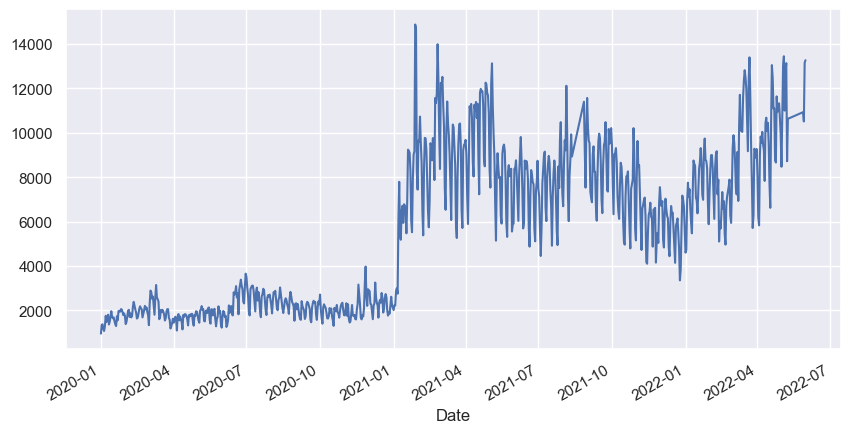

In [25]:
#Lets take a look at sales over time
plt.figure(figsize=(10,5))
Burger_data.set_index('Date')['burger_sales'].plot()

### Finding the Linear Relationships

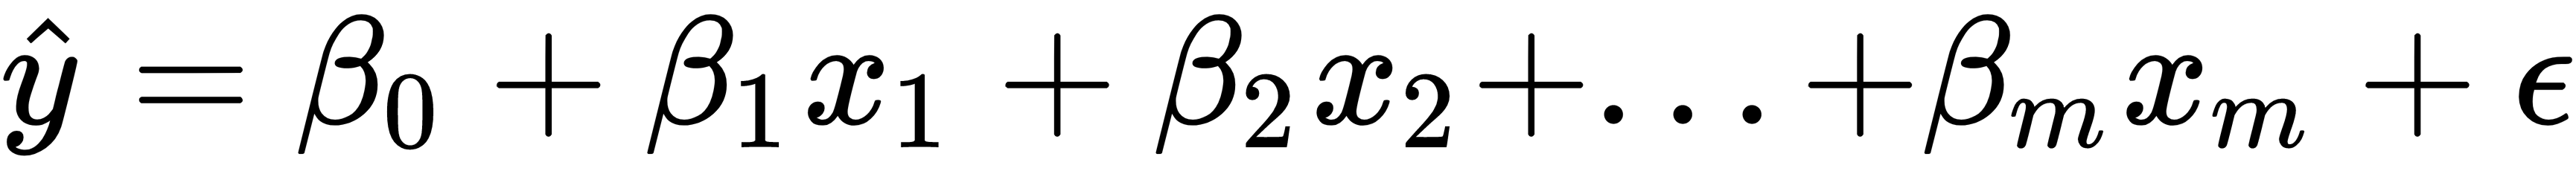

In statistics, a linear relationship refers to a relationship between two variables in which a change in one variable is associated with a proportional change in the other variable. This means that as one variable increases, the other variable also increases (or decreases) by a fixed amount per unit of change.

A linear relationship can be described mathematically using a linear equation, typically in the form of y = mx + b, where y is the dependent variable, x is the independent variable, m is the slope of the line (which represents the rate of change between the two variables), and b is the y-intercept (the value of y when x is equal to 0).

A scatterplot can be used to visualize a linear relationship between two variables. If the points on the scatterplot form a roughly straight line, with little scattering around the line, then the two variables have a linear relationship. A line of best fit can be drawn through the points to help estimate the slope and intercept of the linear equation.

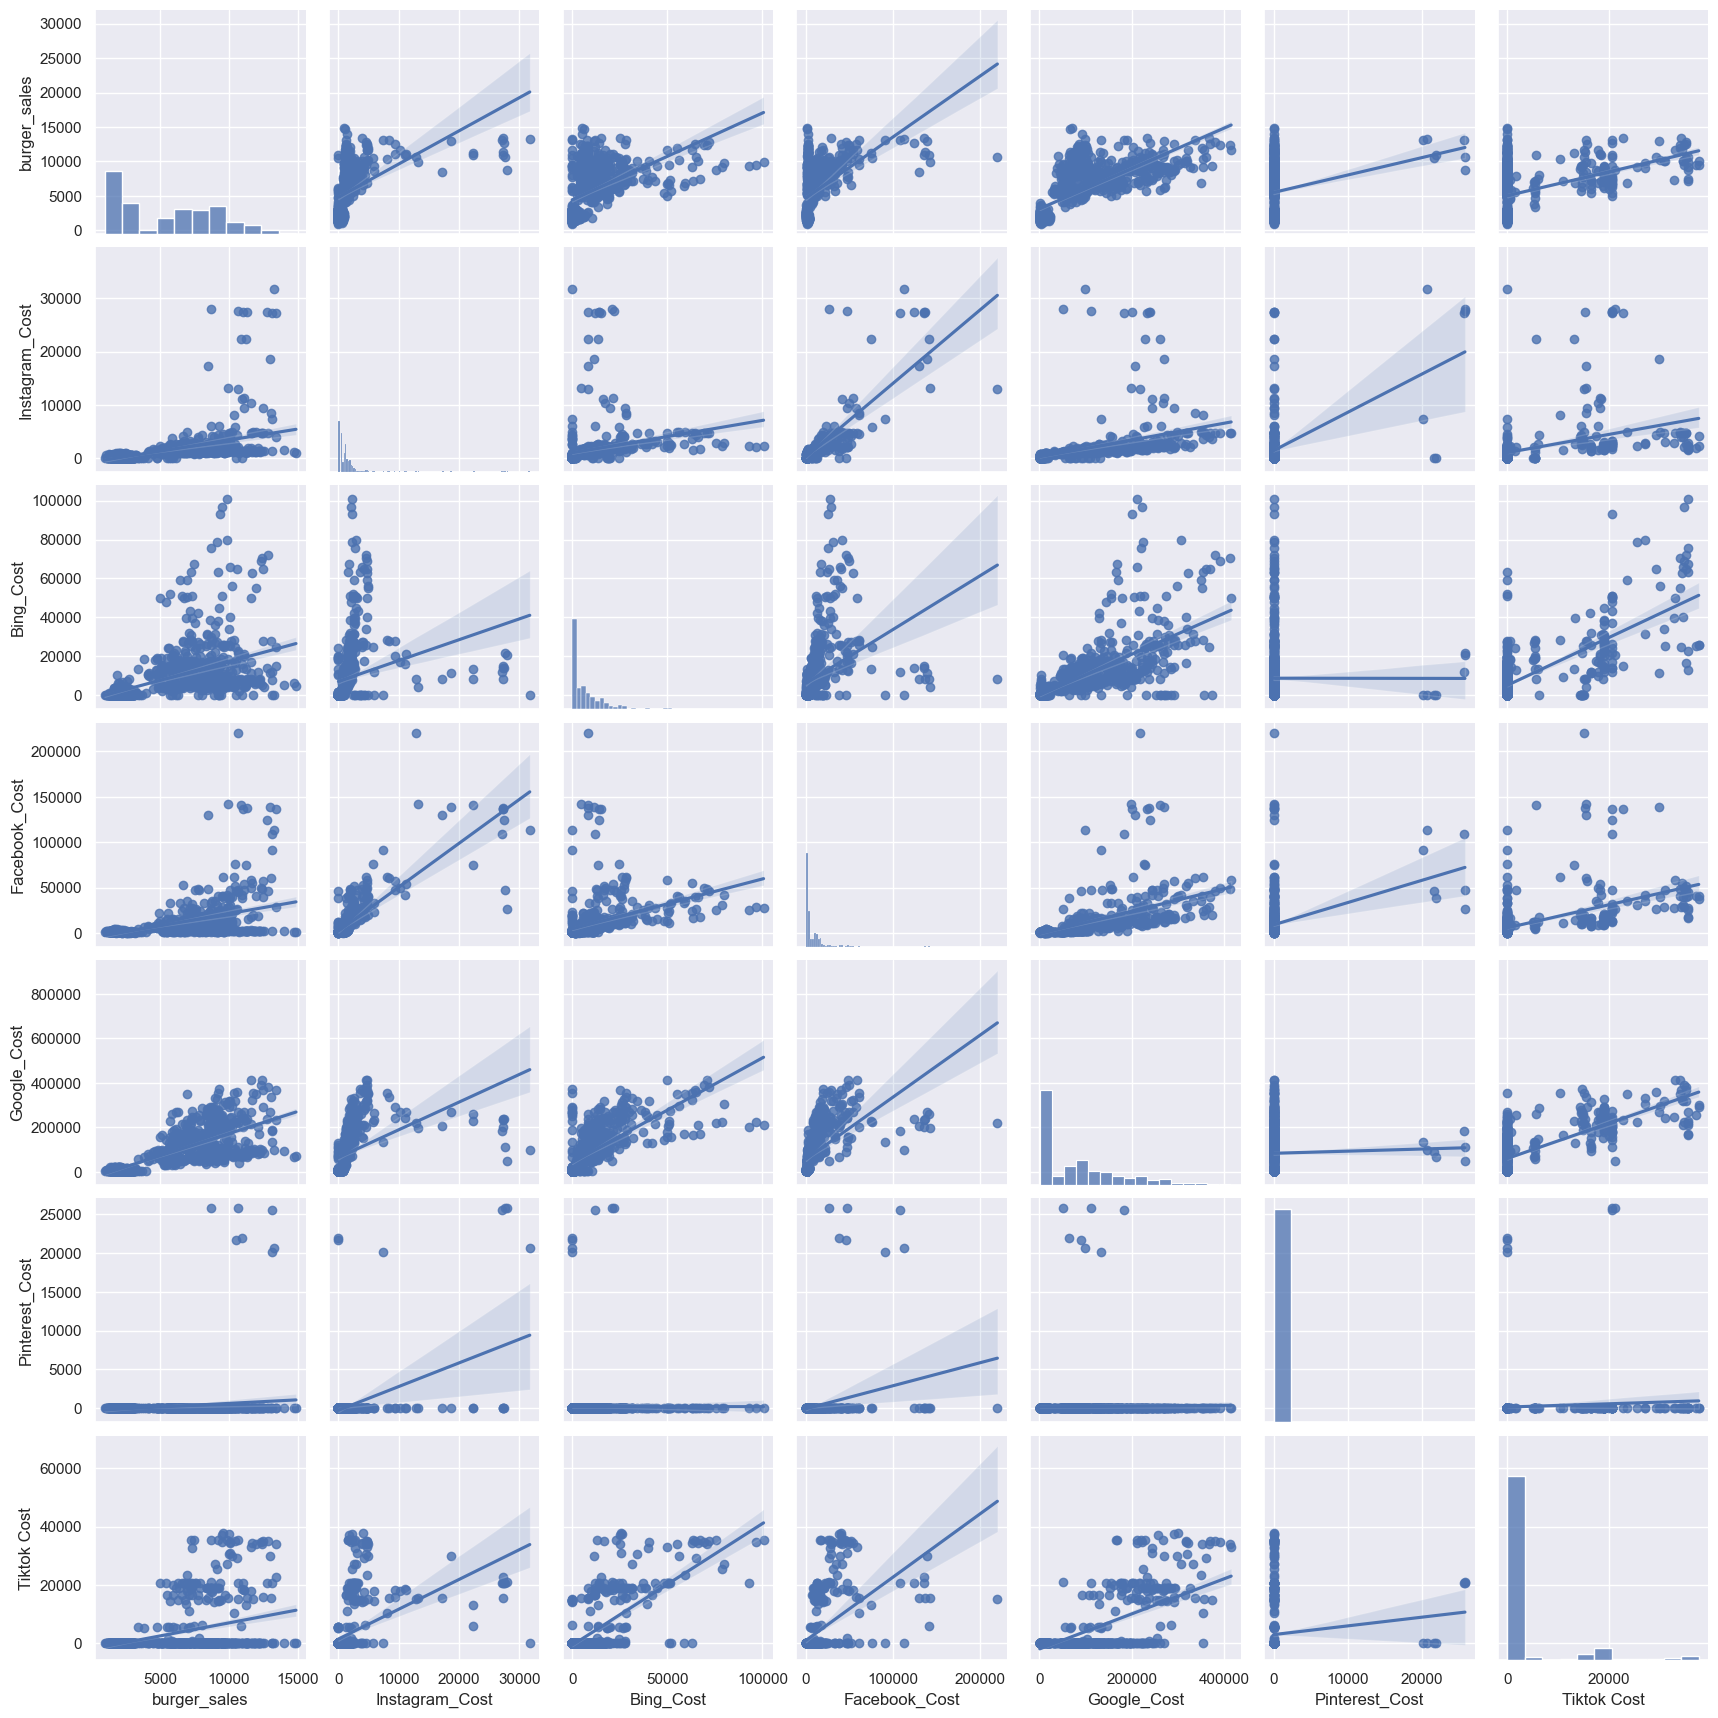

In [26]:
sns.set(rc={'figure.figsize':(5.7,6.27)})
sns.pairplot(Burger_data, diag_kind='hist',kind='reg')

### Correlation of Variables

We check variable correlation during Exploratory Data Analysis (EDA) in machine learning to understand the relationship between different variables in the dataset. Correlation measures the degree to which two variables are related to each other, and it helps us to identify patterns and dependencies in the data.

There are several reasons why we check variable correlation during EDA:

1. <strong>Identify Strong Predictors</strong>: Correlation helps us to identify the variables that are strongly correlated with the target variable. These variables are likely to be good predictors of the target variable, and we can use them to build accurate predictive models.

2. <strong>Avoid Multicollinearity</strong>: Correlation helps us to identify variables that are highly correlated with each other. When two variables are highly correlated, they provide redundant information, which can cause problems in some machine learning algorithms. This phenomenon is known as multicollinearity, and it can lead to unstable and unreliable models.

3. <strong>Feature Selection</strong>: Correlation helps us to identify the most important features in the dataset. By selecting the most correlated features, we can reduce the dimensionality of the dataset, which can help to improve the performance of some machine learning algorithms.

<AxesSubplot:>

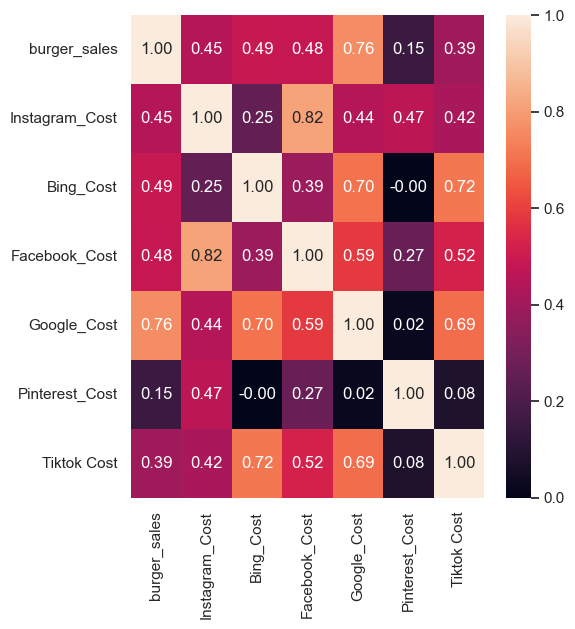

In [27]:
#lets look the correlation in a heatmap
corr = Burger_data[['burger_sales', 'Instagram_Cost', 'Bing_Cost', 'Facebook_Cost',
       'Google_Cost', 'Pinterest_Cost', 'Tiktok Cost']].corr()
sns.heatmap(corr,fmt='.2f',
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True)

<AxesSubplot:>

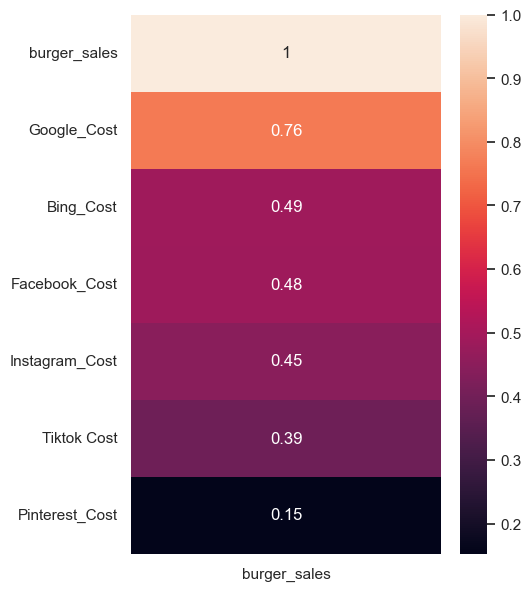

In [28]:
# alternative to a seaborn heatmap.
plt.figure(figsize=(5,7))
sns.heatmap(Burger_data[['burger_sales', 'Instagram_Cost', 'Bing_Cost', 'Facebook_Cost',
       'Google_Cost', 'Pinterest_Cost', 'Tiktok Cost']]\
            .corr()[['burger_sales']].sort_values(by='burger_sales',ascending=False),annot=True)

### Adding the Impact of Lags (Erosion Effect)

Erosion effect in marketing data analysis refers to the reduction in the effectiveness of a marketing campaign or promotional activity over time. This can occur due to a variety of factors such as increasing competition, changes in consumer behavior or preferences, or diminishing returns on investment.

For example, if a company launches a new product with a high level of promotional activity, they may see a significant increase in sales in the short term. However, over time, the effectiveness of the promotional activity may start to diminish, resulting in lower sales and revenue.


To mitigate the erosion effect, marketing analysts can use data analysis techniques to monitor the effectiveness of marketing campaigns over time and make adjustments to improve their effectiveness. This may involve analyzing data on customer behavior, sales trends, and market conditions to identify areas where changes can be made to improve the performance of the marketing campaign.

Marketing analysts may also use predictive analytics to forecast the impact of future promotional activities and identify potential areas of erosion. By understanding the factors that contribute to erosion, marketers can develop strategies to minimize its impact and maintain the effectiveness of their marketing efforts over time.

<AxesSubplot:>

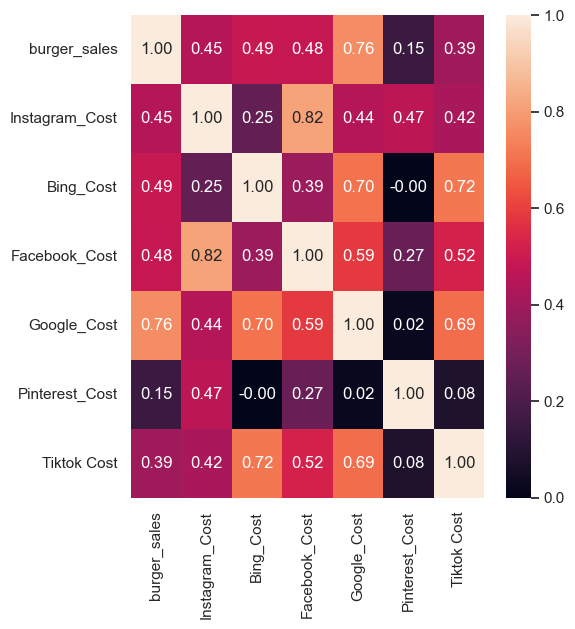

In [29]:
#lets look the correlation in a heatmap
corr = Burger_data[['burger_sales', 'Instagram_Cost', 'Bing_Cost', 'Facebook_Cost',
       'Google_Cost', 'Pinterest_Cost', 'Tiktok Cost']].corr()
sns.heatmap(corr,fmt='.2f',
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True)

In [83]:
# create a column list
col_list=['Instagram_Cost', 'Bing_Cost', 'Facebook_Cost', 'Google_Cost', 'Pinterest_Cost', 'Tiktok Cost']
# create an empty list of lagged values
lag_col_list=[]
# Loop through the columns in col_list, create a new column with the name 'Lag' + column name,
# shift the values of the original column by 1, and fill the first row with 0
for var in col_list:
    Burger_data['Lag_'+var]=Burger_data[var].shift(1).fillna(0)# Append the name of the new column to lag_col_list
    lag_col_list.append('Lag_'+var)
# Insert the name of the 'burger_sales' column at the beginning of lag_col_list
lag_col_list.insert(0,'burger_sales')
Burger_data.head()

,Date,burger_sales,Instagram_Cost,Bing_Cost,Facebook_Cost,Google_Cost,Pinterest_Cost,Tiktok Cost,Lag_Instagram_Cost,Lag_Bing_Cost,Lag_Facebook_Cost,Lag_Google_Cost,Lag_Pinterest_Cost,Lag_Tiktok Cost
0,2020-01-01,950,0.0,0.0,1041.1,4447.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-02,1340,582.5,0.0,2597.0,6561.1,0.0,0.0,0.0,0.0,1041.1,4447.4,0.0,0.0
2,2020-01-03,1370,551.5,0.0,2580.0,6500.3,0.0,0.0,582.5,0.0,2597.0,6561.1,0.0,0.0
3,2020-01-04,1160,0.0,0.0,2245.5,6499.6,0.0,0.0,551.5,0.0,2580.0,6500.3,0.0,0.0
4,2020-01-05,1070,540.0,0.0,1751.1,6499.1,0.0,0.0,0.0,0.0,2245.5,6499.6,0.0,0.0


<AxesSubplot:>

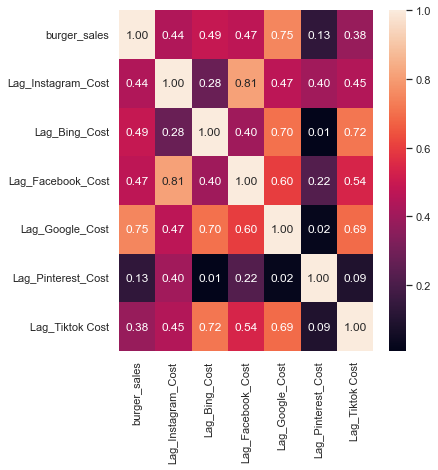

In [84]:
# lets look at a heatmap of the correlation 
corr = Burger_data[lag_col_list].corr()
sns.heatmap(corr,fmt='.2f',
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True)

In [85]:
#let's look at two lag variables
col_list=['Instagram_Cost', 'Bing_Cost', 'Facebook_Cost',
       'Google_Cost', 'Pinterest_Cost', 'Tiktok Cost']
lag_col_list=[]
for var in col_list:
    Burger_data['Lag_'+var]=Burger_data[var].shift(2).fillna(0)
    lag_col_list.append('Lag_'+var)
lag_col_list.insert(0,'burger_sales')

<AxesSubplot:>

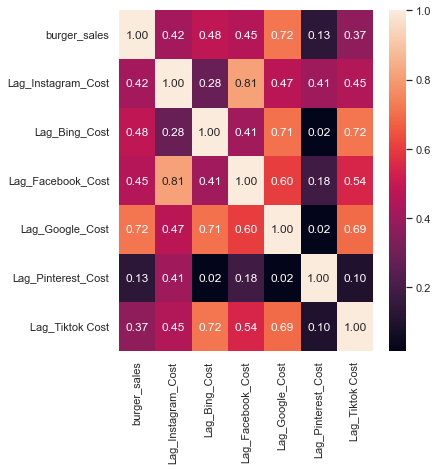

In [86]:
corr = Burger_data[lag_col_list].corr()
sns.heatmap(corr,fmt='.2f',
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True)

#### Visualize the change in correlation that occurs in the last 10 days

In [87]:
# Define a list of advertising cost column names
col_list=['Instagram_Cost', 'Bing_Cost', 'Facebook_Cost',
       'Google_Cost', 'Pinterest_Cost', 'Tiktok Cost']
target_var='burger_sales'
# Define a list of lag values to be used for each cost column
lag_list=[1,2,3,4,5,6,7,8,9,10]
corr_connection=pd.DataFrame()
#Create a new lagged column for the current cost column.
# The correlation value is then appended to the corr_connection DataFrame, along with the column name and lag value
for col in col_list:
    for lag in lag_list:
        Burger_data['Lag'+col]=Burger_data[col].shift(lag).fillna(0)
        corr_connection=corr_connection.append(pd.\
                                               DataFrame([col,lag,Burger_data[['Lag'+col,target_var]].\
                                                          corr()[target_var]['Lag'+col]]).T)

In [88]:
# add the column names 
corr_connection.columns=['Channel','Lag','Correlation']
corr_connection.head(10)

,Channel,Lag,Correlation
0,Instagram_Cost,1,0.438407
0,Instagram_Cost,2,0.41764
0,Instagram_Cost,3,0.413234
0,Instagram_Cost,4,0.42261
0,Instagram_Cost,5,0.438737
0,Instagram_Cost,6,0.455814
0,Instagram_Cost,7,0.469399
0,Instagram_Cost,8,0.474394
0,Instagram_Cost,9,0.471373
0,Instagram_Cost,10,0.465562


### Erosion Effect in Correlation
The erosion effect in correlation refers to a phenomenon where the strength of a correlation between two variables decreases or disappears over time. This can happen when one or both variables are affected by external factors that are not accounted for in the correlation analysis.

For example, suppose a correlation analysis is conducted between advertising spend and sales revenue for a specific period, and a strong positive correlation is found between the two variables. However, over time, the correlation weakens or disappears as other factors such as changes in consumer preferences, competitor activities, or economic conditions affect sales revenue, but not advertising spend.

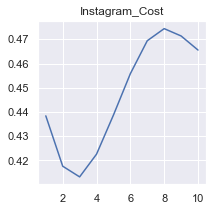

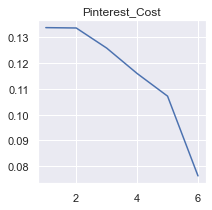

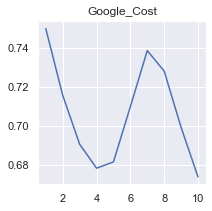

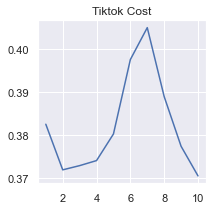

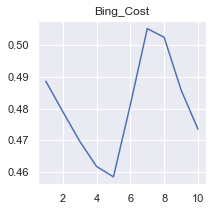

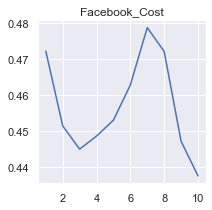

In [89]:
# lets create some visuals with a simple loop
sns.set(rc={'figure.figsize':(3,3)})
for channel in set(corr_connection['Channel']):
    data=corr_connection[corr_connection['Channel']==channel]
    plt.plot(data['Lag'], data['Correlation'])  # Plot the chart
    plt.title(channel)
    plt.show()  # display

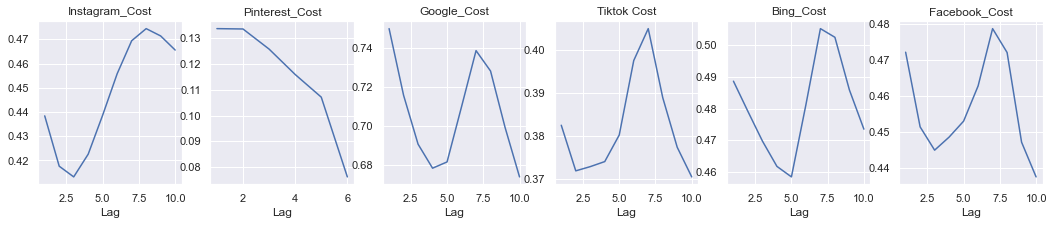

In [90]:
# Create a new figure with subplots for each channel
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(18, 3))
# Loop through the channels and plot the correlation data for each channel in a separate subplot
for i, channel in enumerate(set(corr_connection['Channel'])):
    
    # Select the data for the current channel from the corr_connection DataFrame
    data = corr_connection[corr_connection['Channel'] == channel]
    
    # Plot the correlation data on the current subplot
    axes[i].plot(data['Lag'], data['Correlation'])
    
    # Set the title and x-label of the current subplot
    axes[i].set_title(channel)
    axes[i].set_xlabel('Lag')


### Linear Relationship (Multivariate Coefficents)

Linear regression analysis is a commonly used technique in market mix modelling (MMM). MMM is a statistical approach to analyzing the impact of different marketing variables on business performance, such as sales, revenue, or market share.

Linear regression analysis is used to estimate the relationship between the dependent variable (such as sales or revenue) and the independent variables (such as advertising spend, pricing, promotions, and other marketing factors). The goal of the analysis is to determine how changes in the independent variables impact the dependent variable.

In market mix modelling, a linear regression model is typically developed using historical data on marketing variables and business performance. The model is then used to predict the impact of changes in marketing variables on future business performance.

To perform a linear regression analysis for market mix modelling, the following steps are typically taken:

1. Identify the dependent variable, which is usually a business performance metric such as sales or revenue.

2. Identify the independent variables, which are typically marketing variables such as advertising spend, pricing, promotions, and other factors that may impact the dependent variable.

3. Collect historical data on the dependent and independent variables.

4. Use the historical data to develop a linear regression model that estimates the relationship between the independent variables and the dependent variable.

5. Validate the model by comparing its predictions with actual business performance data.

6. Use the model to forecast the impact of changes in the independent variables on future business performance.

By using linear regression analysis for market mix modelling, businesses can gain insights into the impact of their marketing activities on business performance and make data-driven decisions to optimize their marketing strategies.

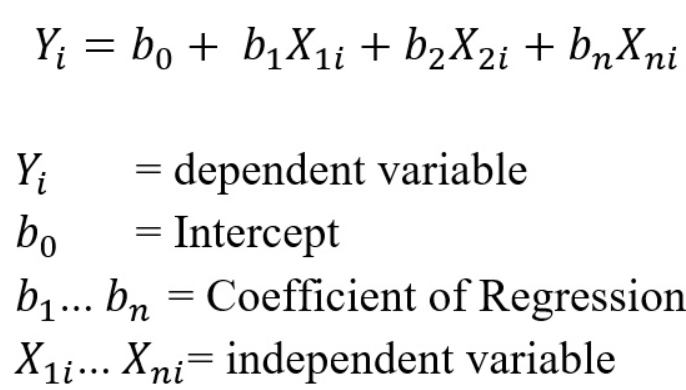

In [91]:
from statsmodels.formula.api import ols
# Load data into a pandas DataFrame
# Split data into dependent and independent variables
Burger_data['Tiktok_Cost']=Burger_data['Tiktok Cost']
X = Burger_data[['Instagram_Cost', 'Bing_Cost', 'Facebook_Cost',
       'Google_Cost', 'Pinterest_Cost', 'Tiktok_Cost']]
y = Burger_data['burger_sales']
#Build our model
model = ols("burger_sales ~ Instagram_Cost + Bing_Cost + Facebook_Cost + Google_Cost + Pinterest_Cost + Tiktok_Cost",
                data=Burger_data).fit()
# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           burger_sales   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     265.9
Date:                Sat, 15 Apr 2023   Prob (F-statistic):          1.37e-190
Time:                        21:19:56   Log-Likelihood:                -7684.4
No. Observations:                 850   AIC:                         1.538e+04
Df Residuals:                     843   BIC:                         1.542e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2729.6715    101.122     26.

### Synergy Impact Analysis (Interaction Variables)

The synergy effect is a concept that refers to the combined impact of multiple marketing variables that is greater than the sum of their individual effects. In the context of market mix modelling using linear regression analysis, the synergy effect can be observed when the impact of two or more independent variables on the dependent variable is greater when they are used together than when they are used separately.

For example, consider a company that is running two different marketing campaigns - one on TV and one on social media. Individually, each campaign may have a positive impact on sales. However, when the campaigns are used together, they may have a greater impact on sales than the sum of their individual effects. This is the synergy effect.

Linear regression analysis can help to identify and quantify the synergy effect in market mix modelling by analyzing the interaction between different independent variables. By identifying which combinations of marketing variables produce the greatest impact on the dependent variable, businesses can optimize their marketing strategies to take advantage of the synergy effect and maximize their return on investment.

In [92]:
from statsmodels.formula.api import ols
# Load data into a pandas DataFrame
# Split data into dependent and independent variables
X = Burger_data[['Instagram_Cost', 'Bing_Cost', 'Facebook_Cost',
       'Google_Cost', 'Pinterest_Cost', 'Tiktok Cost']]
y = Burger_data['burger_sales']

interM_lm = ols("burger_sales ~ Instagram_Cost * Bing_Cost * Facebook_Cost  + Google_Cost + Pinterest_Cost + Tiktok_Cost ",
                data=Burger_data).fit()
print(interM_lm.summary())


# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           burger_sales   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     176.9
Date:                Sat, 15 Apr 2023   Prob (F-statistic):          6.27e-199
Time:                        21:19:56   Log-Likelihood:                -7653.8
No. Observations:                 850   AIC:                         1.533e+04
Df Residuals:                     839   BIC:                         1.538e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [93]:
interM_lm2 = ols("burger_sales ~ Instagram_Cost * Facebook_Cost + Bing_Cost * Google_Cost * Tiktok_Cost + Pinterest_Cost ",
                data=Burger_data).fit()
print(interM_lm2.summary())

                            OLS Regression Results                            
Dep. Variable:           burger_sales   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     190.5
Date:                Sat, 15 Apr 2023   Prob (F-statistic):          2.70e-219
Time:                        21:19:56   Log-Likelihood:                -7603.4
No. Observations:                 850   AIC:                         1.523e+04
Df Residuals:                     838   BIC:                         1.529e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [94]:
#lets save these variables
coefficients = pd.DataFrame(model.params,columns=['coefficent']).iloc[1:,:]
intercept  =  2729.671484
coefficients

,coefficent
Instagram_Cost,0.195496
Bing_Cost,0.018912
Facebook_Cost,-0.013572
Google_Cost,0.034574
Pinterest_Cost,0.155428
Tiktok_Cost,-0.144266


In [95]:
from statsmodels.formula.api import ols
# Load data into a pandas DataFrame
# Split data into dependent and independent variables
Burger_data['Tiktok_Cost']=Burger_data['Tiktok Cost']
X = Burger_data[['Instagram_Cost', 'Bing_Cost', 'Facebook_Cost',
       'Google_Cost', 'Pinterest_Cost', 'Tiktok_Cost']]
y = Burger_data['burger_sales']
#Build our model
model = ols("burger_sales ~ Instagram_Cost + Bing_Cost + Facebook_Cost + Google_Cost + Pinterest_Cost + Tiktok_Cost",
                data=Burger_data).fit()
X = pd.DataFrame(X,columns=['Instagram_Cost', 'Bing_Cost', 'Facebook_Cost',
       'Google_Cost', 'Pinterest_Cost', 'Tiktok_Cost'])
burg_pred = model.predict(X)
burg_pred

0       2869.307019
1       3035.145951
2       3027.214201
3       2923.914049
4       3036.174399
           ...     
845    12871.146797
846     7857.640344
847     8578.170427
848    10698.273758
849    14081.231042
Length: 850, dtype: float64

In [96]:
# lets check the mean squared error or RMSE
import numpy as np 
from sklearn.metrics import mean_squared_error
Burger_data['predictions'] = burg_pred
#check the mean squared error 
np.sqrt(mean_squared_error(y,burg_pred))

2041.792029108678

In [97]:
#distribution of budget
X.melt().groupby('variable').sum()/X.melt()['value'].sum()



,value
variable,
Bing_Cost,0.082969
Facebook_Cost,0.088499
Google_Cost,0.784485
Instagram_Cost,0.014439
Pinterest_Cost,0.001791
Tiktok_Cost,0.027817


### Marketing Thresholds
You can use a decision tree to get the thresholds for cost in your marketing mix model. Decision trees are a powerful machine learning algorithm that can help identify the optimal decision rules based on the data. In the context of a marketing mix model, decision trees can help identify the thresholds or breakpoints for the marketing spends on different channels, beyond which the impact on sales or revenue diminishes.

In [112]:
from sklearn.tree import DecisionTreeRegressor
# Split data into dependent and independent variables
X = Burger_data[['Instagram_Cost', 'Bing_Cost', 'Facebook_Cost',
       'Google_Cost', 'Pinterest_Cost', 'Tiktok Cost']]
y = Burger_data['burger_sales']
# Create and fit the Decision Tree Regressor
dtc = DecisionTreeRegressor(max_depth = 2)
dtc.fit(X, y)
# Generate a graph plot of the Decision Tree
from matplotlib import pyplot as plt
from sklearn import tree
# Fit the regressor, set max_depth = 2
text_representation = tree.export_text(dtc, feature_names=['Instagram_Cost', 'Bing_Cost', 'Facebook_Cost',
       'Google_Cost', 'Pinterest_Cost', 'Tiktok Cost'])
print(text_representation)

|--- Google_Cost <= 25953.28
|   |--- Facebook_Cost <= 991.70
|   |   |--- value: [2156.08]
|   |--- Facebook_Cost >  991.70
|   |   |--- value: [1862.48]
|--- Google_Cost >  25953.28
|   |--- Instagram_Cost <= 4608.30
|   |   |--- value: [8014.42]
|   |--- Instagram_Cost >  4608.30
|   |   |--- value: [11218.65]



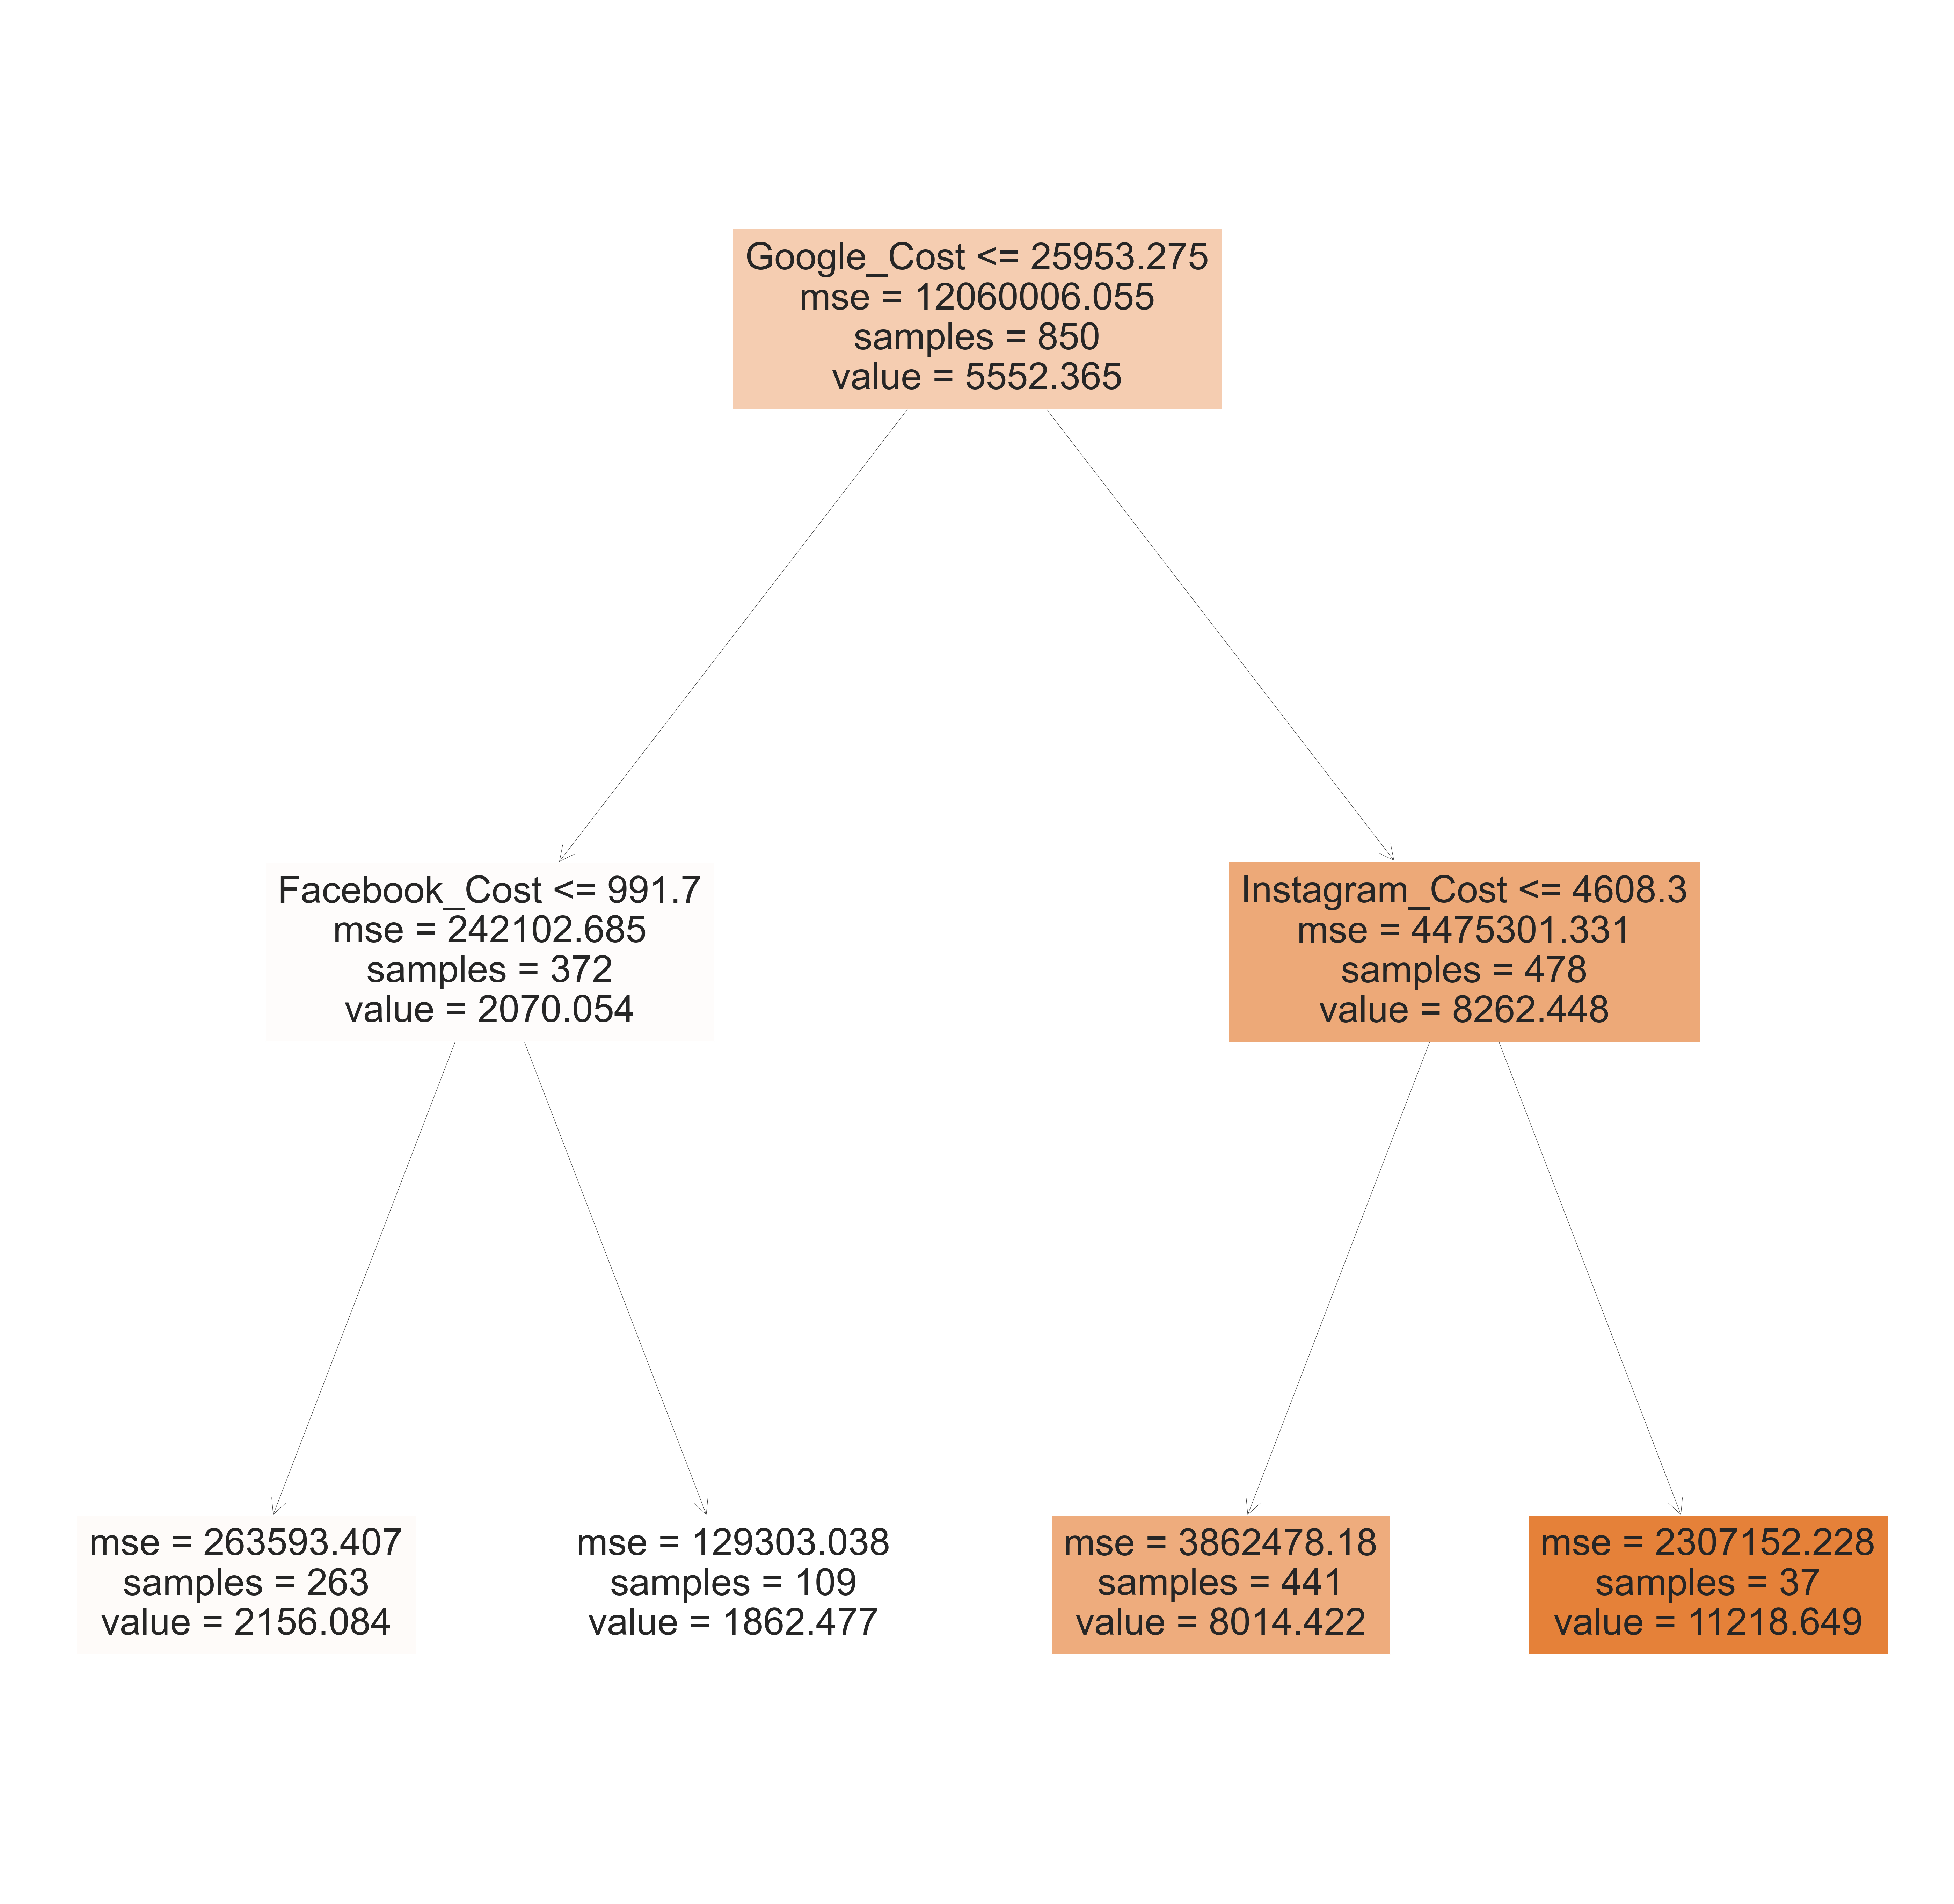

In [110]:
#lets visualize with a Decision Tree 
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
# Plot the decision tree
plt.figure(figsize=(100,100))
plot_tree(dtc, feature_names=X.columns, filled=True)
plt.show()

# BONUS CODE

## Ideal Channel Budget Contribution with Scipy Optimize

In [99]:
from scipy.optimize import minimize
coefficients = coefficients['coefficent']


In [100]:
# define the objective function for optimization
def objective(x):
    return -1 * (coefficients[0] * x[0] + coefficients[1] * x[1] + coefficients[2] * x[2] + coefficients[3] * x[3]+ coefficients[4] * x[4]+ coefficients[5] * x[5] + intercept)

# define the constraint function for optimization
def constraint(x):
    return 200000 - (coefficients[0] * x[0] + coefficients[1] * x[1] + coefficients[2] * x[2] + coefficients[3] * x[3]+ coefficients[4] * x[4]+ coefficients[5] * x[5] + intercept)

# set the initial guess for the optimization
x0 = np.array([1/6, 1/6, 1/6,1/6, 1/6, 1/6])

# perform the optimization
solution = minimize(objective, x0, constraints={'type': 'eq', 'fun': constraint})


In [101]:
# calculate the actual percentage for each channel contribution
total_sales = -(solution.fun)
instagram_percentage = coefficients[0] * solution.x[0] / total_sales
bing_percentage = coefficients[1] * solution.x[1] / total_sales
facebook_percentage = coefficients[2] * solution.x[2] / total_sales
google_percentage = coefficients[3] * solution.x[3] / total_sales
pinterest_percentage = coefficients[4] * solution.x[4] / total_sales
tiktok_percentage = coefficients[5] * solution.x[5] / total_sales


# print the results
print('Coefficients:', coefficients)
print('Intercept:', intercept)
print('Instagram percentage:', instagram_percentage)
print('Bing percentage:', bing_percentage)
print('Facebook percentage:', facebook_percentage)
print('Google percentage:', google_percentage)
print('Pinterest percentage:', pinterest_percentage)
print('Tiktok percentage:', tiktok_percentage)

Coefficients: Instagram_Cost    0.195496
Bing_Cost         0.018912
Facebook_Cost    -0.013572
Google_Cost       0.034574
Pinterest_Cost    0.155428
Tiktok_Cost      -0.144266
Name: coefficent, dtype: float64
Intercept: 2729.671484
Instagram percentage: 0.4292174037612096
Bing percentage: 0.004048518459433804
Facebook percentage: 0.0020858161792984583
Google percentage: 0.013473946301470011
Pinterest percentage: 0.27129142013238533
Tiktok percentage: 0.2343883704328738
